# Scope 3 Carbon Emissions Calculator



#### Sponsor: FI Consulting
#### GWU Team: Elias Moreno, Harshit Aggarwal, Mariam Kurasbediani, Ming Tang, Rui Cheng

### Data Loading and Libary Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_2020=pd.read_csv('foia-7afy2020-present-asof-220630.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
df_2020.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20220630,7A,Mark Dusa,3623 Swallow Tail Lane,Sylvania,OH,43560,The Huntington National Bank,6560.0,NaN,...,CLEVELAND DISTRICT OFFICE,5.0,INDIVIDUAL,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,0
1,20220630,7A,Shaddai Harris,614 Valley Spring Drive,Arlington,TX,76018,PeopleFund,NaN,NaN,...,DALLAS / FT WORTH DISTRICT OFFICE,6.0,INDIVIDUAL,"Startup, Loan Funds will Open Business",PIF,04/30/2020,NaN,0,0,1
2,20220630,7A,Aqualon Inc.,7180 Agenbroad Rd,Tipp City,OH,45371,The Huntington National Bank,6560.0,NaN,...,COLUMBUS DISTRICT OFFICE,8.0,CORPORATION,Existing or more than 2 years old,PIF,10/31/2021,NaN,0,0,0
3,20220630,7A,Redline Restaurants Inc,2450 Cherokee Road,Saint Cloud,FL,34772,"SouthState Bank, National Association",33555.0,NaN,...,SOUTH FLORIDA DISTRICT OFFICE,9.0,CORPORATION,Change of Ownership,EXEMPT,NaN,NaN,0,0,50
4,20220630,7A,Meluota Corp,2702 ASTORIA BLVD,ASTORIA,NY,11102,"Santander Bank, National Association",29950.0,NaN,...,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,3


### Data Cleaning

In [4]:
# Drop duplicates
df_2020 = df_2020.drop_duplicates()

In [5]:
# Drop values if Industry code is missing
df_2020 = df_2020.dropna(subset=['NaicsCode']) 

In [6]:
# Check for missing values
df_2020.isnull().sum()

AsOfDate                      0
Program                       0
BorrName                      2
BorrStreet                    0
BorrCity                      0
BorrState                     0
BorrZip                       0
BankName                      0
BankFDICNumber            11581
BankNCUANumber           124272
BankStreet                    0
BankCity                      0
BankState                     0
BankZip                       0
GrossApproval                 0
SBAGuaranteedApproval         0
ApprovalDate                  0
ApprovalFiscalYear            0
FirstDisbursementDate     23129
DeliveryMethod                0
subpgmdesc                    0
InitialInterestRate           1
TermInMonths                  0
NaicsCode                     0
NaicsDescription           2091
FranchiseCode            109226
FranchiseName            109285
ProjectCounty                 4
ProjectState                  0
SBADistrictOffice             0
CongressionalDistrict         0
Business

In [7]:
# Analysis for year 2022 only
df_2022=df_2020[df_2020['ApprovalFiscalYear'].isin([2022])]

In [8]:
df_2022['LoanStatus'].unique()

array(['EXEMPT', 'CANCLD', 'COMMIT', 'PIF'], dtype=object)

In [9]:
# Drop loans which have been canceled 
df_2022 = df_2022[df_2022.LoanStatus != 'CANCLD']

In [10]:
df_2022['LoanStatus'].unique()

array(['EXEMPT', 'COMMIT', 'PIF'], dtype=object)

In [11]:
# Check the recording numbers for same company
df_2022[['BorrName','NaicsCode','LoanStatus']].value_counts()

BorrName                        NaicsCode  LoanStatus
Reliable HVAC & Plumbing LLC    238220.0   COMMIT        4
LUMOS INFRARED SAUNA STUDIO L   812990.0   COMMIT        4
Oras Express LLC                484121.0   EXEMPT        4
Infinite Global Management Inc  484110.0   COMMIT        4
JBLREG HOLDINGS COMPANY LLC     541213.0   EXEMPT        4
                                                        ..
G'S CHIPS INC.                  424450.0   EXEMPT        1
G&S LAND SOLUTIONS INC.         541320.0   COMMIT        1
G&S Garden View LLC             621210.0   COMMIT        1
G&S CONSULTANTS LLC             236220.0   COMMIT        1
zr tradings llc                 423690.0   EXEMPT        1
Length: 30399, dtype: int64

In [12]:
df_2022[df_2022['BorrName']=='Comfort Keepers']

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
96157,20220630,7A,Comfort Keepers,10721 MAIN ST Suites 304 & 3,FAIRFAX,VA,22030,Live Oak Banking Company,58665.0,NaN,...,WASHINGTON DISTRICT OFFICE,10.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,100
101080,20220630,7A,Comfort Keepers,920 WEST SPROUL ROAD SUITE 0,SPRINGFIELD,PA,19064,Live Oak Banking Company,58665.0,NaN,...,PHILADELPHIA DISTRICT OFFICE,5.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,200
101086,20220630,7A,Comfort Keepers,920 WEST SPROUL ROAD SUITE 0,SPRINGFIELD,PA,19064,Live Oak Banking Company,58665.0,NaN,...,PHILADELPHIA DISTRICT OFFICE,5.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,0,200
121795,20220630,7A,Comfort Keepers,1149 CREIGHTON RD UNIT 5,PENSACOLA,FL,32504,Live Oak Banking Company,58665.0,NaN,...,NORTH FLORIDA DISTRICT OFFICE,1.0,CORPORATION,Change of Ownership,COMMIT,NaN,NaN,0,1,87
121796,20220630,7A,Comfort Keepers,1149 CREIGHTON RD UNIT 5,PENSACOLA,FL,32504,Live Oak Banking Company,58665.0,NaN,...,NORTH FLORIDA DISTRICT OFFICE,1.0,CORPORATION,Change of Ownership,COMMIT,NaN,NaN,0,0,87


In [13]:
# calculate the total gross approval for every company
df_2022=df_2022.groupby(['BorrName','BusinessType','NaicsCode','NaicsDescription','BankName','BorrState', 'BorrZip'])[['GrossApproval','SBAGuaranteedApproval', 'JobsSupported']].sum().reset_index()

In [14]:
#check the same company for different code
df_2022[df_2022['BorrName']=='Comfort Keepers']

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported
6122,Comfort Keepers,CORPORATION,621610.0,Home Health Care Services,Live Oak Banking Company,VA,22030,150000.0,75000.0,100
6123,Comfort Keepers,CORPORATION,624120.0,Services for the Elderly and Persons with Disa...,Live Oak Banking Company,FL,32504,1800000.0,1312500.0,174
6124,Comfort Keepers,CORPORATION,812990.0,All Other Personal Services,Live Oak Banking Company,PA,19064,2330000.0,1697500.0,400


In [15]:
# Drop any new duplicates that might have been created
df_2022.drop_duplicates()

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported
0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120.0,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000.0,390000.0,8
1,$NP DESIGNS LLC,CORPORATION,541430.0,Graphic Design Services,"Newtek Small Business Finance, Inc.",NY,10119,10000.0,5000.0,2
2,''1st Care AFH LLC,CORPORATION,623312.0,Homes for the Elderly,Umpqua Bank,WA,98058,1116600.0,837450.0,2
3,'brosia bowl LLC,INDIVIDUAL,722513.0,Limited-Service Restaurants,Celtic Bank Corporation,SD,57104,35800.0,30430.0,6
4,1 BEAUTY US LLC,CORPORATION,446120.0,"Cosmetics, Beauty Supplies, and Perfume Stores","Readycap Lending, LLC",CA,92211,350000.0,262500.0,10
...,...,...,...,...,...,...,...,...,...,...
28308,wallingford gulf llc,CORPORATION,811198.0,All Other Automotive Repair and Maintenance,"Webster Bank, National Association",CT,6492,50000.0,25000.0,0
28309,willam trading LLC,CORPORATION,423990.0,Other Miscellaneous Durable Goods Merchant Who...,"TD Bank, National Association",NJ,7022,90000.0,45000.0,0
28310,xive Corporation,CORPORATION,621610.0,Home Health Care Services,"United Midwest Savings Bank, National Association",MD,21061,125000.0,106250.0,6
28311,yummy house china bistro inc,CORPORATION,722511.0,Full-Service Restaurants,Cadence Bank,FL,33610,350000.0,262500.0,21


In [16]:
# Check for nulls
df_2022.isnull().sum()

BorrName                 0
BusinessType             0
NaicsCode                0
NaicsDescription         0
BankName                 0
BorrState                0
BorrZip                  0
GrossApproval            0
SBAGuaranteedApproval    0
JobsSupported            0
dtype: int64

### Data Preparation

Steps:
1. Mapping the industry codes (IO Code) in EEIO Matrix to NAICS Codes.
2. Mapping the industry codes in EEIO Matrix to Industrial GDPs.
3. Estimate GDP with NAICS Code (using GDP with IO Code).
4. Estimate impact values with NAICS Code (using values with IO Code)
5. Import data to Python notebook
6. Calculate aggregated Impact Values at all levels for each industry (1-9,10-99,100-999,1000-9999,10000-99999). Aggregation is conducted by averaging industrial impact values at a certain level based on their GDPs.
7. Create the largest list of codes with all 6 digit numbers(not all are valid NAICS Codes). Assign impact values from the lowest level(6 digit) to the highest(1 digit): find matching codes at 6-digit level. If there’s none find if there’s a value at the 5-digit level that has been aggregated. If none, look at higher levels until find one. The highest level is 0-digit level.
8. The number of digits (0-6) is an indicator of data’s quality. The bigger the better.

In [17]:
df_Impact=pd.read_csv('Impact.csv')

In [18]:
# Create a mapping matrix that mapping from all codes(6 digits) to existing codes
df_Mapping = pd.DataFrame({ 'NaicsCode' : range(100000,1000000,1)})
df_Mapping['NaicsCode']=df_Mapping['NaicsCode'].astype(str)
for i in range(1,7):
    df_Mapping['NaicsCode'+str(i)]=df_Mapping['NaicsCode'].str[:i].astype(int)
df_Mapping

,NaicsCode,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6
0,100000,1,10,100,1000,10000,100000
1,100001,1,10,100,1000,10000,100001
2,100002,1,10,100,1000,10000,100002
3,100003,1,10,100,1000,10000,100003
4,100004,1,10,100,1000,10000,100004
...,...,...,...,...,...,...,...
899995,999995,9,99,999,9999,99999,999995
899996,999996,9,99,999,9999,99999,999996
899997,999997,9,99,999,9999,99999,999997
899998,999998,9,99,999,9999,99999,999998


In [19]:
# Merge with EEIO Matrix by 6-digit NAICS Code
df_MappingNew=df_Mapping.merge(df_Impact,on='NaicsCode',how='left')
df_MappingNew.describe()

,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6,ImpactPotential,GDP
count,900001.000000,900001.000000,900001.000000,900001.000000,900001.000000,900001.000000,4.580000e+02,4.580000e+02
mean,5.000002,54.500019,549.500192,5499.501915,54999.519145,549999.691445,1.585902e-01,6.038083e+04
std,2.581990,25.979165,259.807524,2598.076830,25980.768460,259807.684617,5.099681e-01,1.834210e+05
min,1.000000,10.000000,100.000000,1000.000000,10000.000000,100000.000000,5.490000e-12,4.980000e+02
25%,3.000000,32.000000,325.000000,3250.000000,32500.000000,325000.000000,7.150533e-03,7.896500e+03
50%,5.000000,55.000000,550.000000,5500.000000,55000.000000,550000.000000,1.753783e-02,1.919850e+04
75%,7.000000,77.000000,774.000000,7749.000000,77499.000000,774999.000000,6.694893e-02,4.519475e+04
max,9.000000,99.000000,999.000000,9999.000000,99999.000000,999999.000000,6.198418e+00,3.105973e+06


In [20]:
# Calculate average impact(kg/$)
l=df_MappingNew['ImpactPotential']*df_MappingNew['GDP']
sum1=l.sum()
sum2=df_MappingNew['GDP'].sum()
avg=sum1/sum2

In [21]:
# Calculate average impact(kg/$) at 1-digit level
for i in range(1,10,1):
    l=df_MappingNew.loc[df_MappingNew['NaicsCode1'] == i]['ImpactPotential']*df_MappingNew.loc[df_MappingNew['NaicsCode1'] == i]['GDP']
    sum1=l.sum()
    sum2=df_MappingNew.loc[df_MappingNew['NaicsCode1'] == i]['GDP'].sum()
    df_MappingNew.loc[df_MappingNew['NaicsCode1'] == i, 'ImpactPotential1']=sum1/sum2

In [22]:
# Calculate average impact(kg/$) at 2-digit level
for i in range(10,100,1):
    l=df_MappingNew.loc[df_MappingNew['NaicsCode2'] == i]['ImpactPotential']*df_MappingNew.loc[df_MappingNew['NaicsCode2'] == i]['GDP']
    sum1=l.sum()
    sum2=df_MappingNew.loc[df_MappingNew['NaicsCode2'] == i]['GDP'].sum()
    df_MappingNew.loc[df_MappingNew['NaicsCode2'] == i, 'ImpactPotential2']=sum1/sum2

In [23]:
# Calculate average impact(kg/$) at 3-digit level
for i in range(100,1000,1):
    l=df_MappingNew.loc[df_MappingNew['NaicsCode3'] == i]['ImpactPotential']*df_MappingNew.loc[df_MappingNew['NaicsCode3'] == i]['GDP']
    sum1=l.sum()
    sum2=df_MappingNew.loc[df_MappingNew['NaicsCode3'] == i]['GDP'].sum()
    df_MappingNew.loc[df_MappingNew['NaicsCode3'] == i, 'ImpactPotential3']=sum1/sum2

In [24]:
# Calculate average impact(kg/$) at 4-digit level
for i in range(1000,10000,1):
    l=df_MappingNew.loc[df_MappingNew['NaicsCode4'] == i]['ImpactPotential']*df_MappingNew.loc[df_MappingNew['NaicsCode4'] == i]['GDP']
    sum1=l.sum()
    sum2=df_MappingNew.loc[df_MappingNew['NaicsCode4'] == i]['GDP'].sum()
    df_MappingNew.loc[df_MappingNew['NaicsCode4'] == i, 'ImpactPotential4']=sum1/sum2

In [25]:
# Calculate average impact(kg/$) at 5-digit level
# Calculation takes long time if consider whole range. Choose 8 ranges that really matter according to EEIO Matrix
#for i in list(range(11110,11600,1))+list(range(21100,24000,1)) + list(range(31000,34000,1))+list(range(42000,50000,1))+list(range(51000,57000,1))+list(range(61000,63000,1))+list(range(71000,72300,1))+list(range(81000,82000,1)):
for i in list(range(11110,100000,1)):
    l=df_MappingNew.loc[df_MappingNew['NaicsCode5'] == i]['ImpactPotential']*df_MappingNew.loc[df_MappingNew['NaicsCode5'] == i]['GDP']
    sum1=l.sum()
    sum2=df_MappingNew.loc[df_MappingNew['NaicsCode5'] == i]['GDP'].sum()
    df_MappingNew.loc[df_MappingNew['NaicsCode5'] == i, 'ImpactPotential5']=sum1/sum2

In [26]:
# Calculate average impact(kg/$) at 6-digit level
df_MappingNew['ImpactPotential6']=df_MappingNew['ImpactPotential']

In [27]:
df_MappingNew

,NaicsCode,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6,ImpactPotential,GDP,ImpactPotential1,ImpactPotential2,ImpactPotential3,ImpactPotential4,ImpactPotential5,ImpactPotential6
0,100000,1,10,100,1000,10000,100000,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN
1,100001,1,10,100,1000,10000,100001,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN
2,100002,1,10,100,1000,10000,100002,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN
3,100003,1,10,100,1000,10000,100003,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN
4,100004,1,10,100,1000,10000,100004,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,999995,9,99,999,9999,99999,999995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899997,999996,9,99,999,9999,99999,999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899998,999997,9,99,999,9999,99999,999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899999,999998,9,99,999,9999,99999,999998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Test
df_MappingNew.loc[df_MappingNew['NaicsCode5'] == 11301]

,NaicsCode,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6,ImpactPotential,GDP,ImpactPotential1,ImpactPotential2,ImpactPotential3,ImpactPotential4,ImpactPotential5,ImpactPotential6
13010,113010,1,11,113,1130,11301,113010,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13011,113011,1,11,113,1130,11301,113011,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13012,113012,1,11,113,1130,11301,113012,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13013,113013,1,11,113,1130,11301,113013,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13014,113014,1,11,113,1130,11301,113014,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13015,113015,1,11,113,1130,11301,113015,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13016,113016,1,11,113,1130,11301,113016,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13017,113017,1,11,113,1130,11301,113017,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13018,113018,1,11,113,1130,11301,113018,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN
13019,113019,1,11,113,1130,11301,113019,NaN,NaN,1.14035,1.14035,0.11348,0.11348,NaN,NaN


In [29]:
df_MappingNewNew=df_MappingNew

In [30]:
df_MappingNewNew.isnull().sum()

NaicsCode                0
NaicsCode1               0
NaicsCode2               0
NaicsCode3               0
NaicsCode4               0
NaicsCode5               0
NaicsCode6               0
ImpactPotential     899543
GDP                 899543
ImpactPotential1    100000
ImpactPotential2    660000
ImpactPotential3    820000
ImpactPotential4    877600
ImpactPotential5    896560
ImpactPotential6    899543
dtype: int64

In [31]:
# Fill Impact values starting from the lowest level(6-digit) to a higher level with valid values if lower level value is null

# Assign Column 'Impact' with 'ImpactPotential6'
# And replaces the values where 'ImpactPotential6' is NaN by column 'ImpactPotential5'
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['ImpactPotential6'].mask(df_MappingNewNew['ImpactPotential6'].isna(), df_MappingNewNew['ImpactPotential5']))

# Replaces the 'Impact' value that is NaN by column 'ImpactPotential4'
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['Impact'].mask(df_MappingNewNew['Impact'].isna(), df_MappingNewNew['ImpactPotential4']))

# Replaces the 'Impact' value that is NaN by column 'ImpactPotential3'
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['Impact'].mask(df_MappingNewNew['Impact'].isna(), df_MappingNewNew['ImpactPotential3']))

# Replaces the 'Impact' value that is NaN by column 'ImpactPotential2'
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['Impact'].mask(df_MappingNewNew['Impact'].isna(), df_MappingNewNew['ImpactPotential2']))

# Replaces the 'Impact' value that is NaN by column 'ImpactPotential1'
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['Impact'].mask(df_MappingNewNew['Impact'].isna(), df_MappingNewNew['ImpactPotential1']))

# Replaces the 'Impact' value that is NaN by avg
df_MappingNewNew=df_MappingNewNew.assign(Impact=df_MappingNewNew['Impact'].mask(df_MappingNewNew['Impact'].isna(), avg))

In [32]:
df_MappingNewNew

,NaicsCode,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6,ImpactPotential,GDP,ImpactPotential1,ImpactPotential2,ImpactPotential3,ImpactPotential4,ImpactPotential5,ImpactPotential6,Impact
0,100000,1,10,100,1000,10000,100000,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350
1,100001,1,10,100,1000,10000,100001,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350
2,100002,1,10,100,1000,10000,100002,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350
3,100003,1,10,100,1000,10000,100003,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350
4,100004,1,10,100,1000,10000,100004,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,999995,9,99,999,9999,99999,999995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844
899997,999996,9,99,999,9999,99999,999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844
899998,999997,9,99,999,9999,99999,999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844
899999,999998,9,99,999,9999,99999,999998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844


In [33]:
# Create column 'Quality' that indicates the granularity and quality of value coresponding to the code
# 6 is the highest that shows 6-digit matching
# ...
# 1 means only 1-digit matching
# 0 means none is matching. We have to use average of all industries.
df_MappingNewNew['Quality']=None
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential6'].notnull())&(df_MappingNewNew['Quality'].isna())]=6
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential5'].notnull())&(df_MappingNewNew['Quality'].isna())]=5
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential4'].notnull())&(df_MappingNewNew['Quality'].isna())]=4
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential3'].notnull())&(df_MappingNewNew['Quality'].isna())]=3
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential2'].notnull())&(df_MappingNewNew['Quality'].isna())]=2
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['ImpactPotential1'].notnull())&(df_MappingNewNew['Quality'].isna())]=1
df_MappingNewNew['Quality'].loc[(df_MappingNewNew['Quality'].isna())]=0

In [34]:
df_2022['NaicsCode']=df_2022['NaicsCode'].astype(str).str[:6]

In [35]:
df_2022

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported
0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000.0,390000.0,8
1,$NP DESIGNS LLC,CORPORATION,541430,Graphic Design Services,"Newtek Small Business Finance, Inc.",NY,10119,10000.0,5000.0,2
2,''1st Care AFH LLC,CORPORATION,623312,Homes for the Elderly,Umpqua Bank,WA,98058,1116600.0,837450.0,2
3,'brosia bowl LLC,INDIVIDUAL,722513,Limited-Service Restaurants,Celtic Bank Corporation,SD,57104,35800.0,30430.0,6
4,1 BEAUTY US LLC,CORPORATION,446120,"Cosmetics, Beauty Supplies, and Perfume Stores","Readycap Lending, LLC",CA,92211,350000.0,262500.0,10
...,...,...,...,...,...,...,...,...,...,...
28308,wallingford gulf llc,CORPORATION,811198,All Other Automotive Repair and Maintenance,"Webster Bank, National Association",CT,6492,50000.0,25000.0,0
28309,willam trading LLC,CORPORATION,423990,Other Miscellaneous Durable Goods Merchant Who...,"TD Bank, National Association",NJ,7022,90000.0,45000.0,0
28310,xive Corporation,CORPORATION,621610,Home Health Care Services,"United Midwest Savings Bank, National Association",MD,21061,125000.0,106250.0,6
28311,yummy house china bistro inc,CORPORATION,722511,Full-Service Restaurants,Cadence Bank,FL,33610,350000.0,262500.0,21


In [36]:
# Merge portfolio and mapping matrix
merged_df_2022=df_2022.merge(df_MappingNewNew, left_on='NaicsCode', right_on='NaicsCode',how='left')[['BorrName','BusinessType','NaicsCode','NaicsDescription','BankName','BorrState','BorrZip','GrossApproval','SBAGuaranteedApproval','JobsSupported','Impact','Quality']]
merged_df_2022=merged_df_2022.rename(columns={'Impact': 'ImpactPotential'})
merged_df_2022

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000.0,390000.0,8,0.004307,3
1,$NP DESIGNS LLC,CORPORATION,541430,Graphic Design Services,"Newtek Small Business Finance, Inc.",NY,10119,10000.0,5000.0,2,0.002760,4
2,''1st Care AFH LLC,CORPORATION,623312,Homes for the Elderly,Umpqua Bank,WA,98058,1116600.0,837450.0,2,0.015045,4
3,'brosia bowl LLC,INDIVIDUAL,722513,Limited-Service Restaurants,Celtic Bank Corporation,SD,57104,35800.0,30430.0,6,0.014357,5
4,1 BEAUTY US LLC,CORPORATION,446120,"Cosmetics, Beauty Supplies, and Perfume Stores","Readycap Lending, LLC",CA,92211,350000.0,262500.0,10,0.004727,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28308,wallingford gulf llc,CORPORATION,811198,All Other Automotive Repair and Maintenance,"Webster Bank, National Association",CT,6492,50000.0,25000.0,0,0.008021,4
28309,willam trading LLC,CORPORATION,423990,Other Miscellaneous Durable Goods Merchant Who...,"TD Bank, National Association",NJ,7022,90000.0,45000.0,0,0.003456,2
28310,xive Corporation,CORPORATION,621610,Home Health Care Services,"United Midwest Savings Bank, National Association",MD,21061,125000.0,106250.0,6,0.008588,4
28311,yummy house china bistro inc,CORPORATION,722511,Full-Service Restaurants,Cadence Bank,FL,33610,350000.0,262500.0,21,0.014357,5


In [37]:
for i in range(0,7):
    print(i,':',round(len(merged_df_2022.loc[merged_df_2022['Quality']==i])/len(merged_df_2022)*100,2),'%')

0 : 0.03 %
1 : 0.0 %
2 : 22.47 %
3 : 18.22 %
4 : 38.26 %
5 : 12.87 %
6 : 8.15 %


In [38]:
merged_df_2022

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000.0,390000.0,8,0.004307,3
1,$NP DESIGNS LLC,CORPORATION,541430,Graphic Design Services,"Newtek Small Business Finance, Inc.",NY,10119,10000.0,5000.0,2,0.002760,4
2,''1st Care AFH LLC,CORPORATION,623312,Homes for the Elderly,Umpqua Bank,WA,98058,1116600.0,837450.0,2,0.015045,4
3,'brosia bowl LLC,INDIVIDUAL,722513,Limited-Service Restaurants,Celtic Bank Corporation,SD,57104,35800.0,30430.0,6,0.014357,5
4,1 BEAUTY US LLC,CORPORATION,446120,"Cosmetics, Beauty Supplies, and Perfume Stores","Readycap Lending, LLC",CA,92211,350000.0,262500.0,10,0.004727,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28308,wallingford gulf llc,CORPORATION,811198,All Other Automotive Repair and Maintenance,"Webster Bank, National Association",CT,6492,50000.0,25000.0,0,0.008021,4
28309,willam trading LLC,CORPORATION,423990,Other Miscellaneous Durable Goods Merchant Who...,"TD Bank, National Association",NJ,7022,90000.0,45000.0,0,0.003456,2
28310,xive Corporation,CORPORATION,621610,Home Health Care Services,"United Midwest Savings Bank, National Association",MD,21061,125000.0,106250.0,6,0.008588,4
28311,yummy house china bistro inc,CORPORATION,722511,Full-Service Restaurants,Cadence Bank,FL,33610,350000.0,262500.0,21,0.014357,5


In [39]:
merged_df_2022.loc[merged_df_2022['Quality']==3]

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000.0,390000.0,8,0.004307,3
9,1 Stop Restoration LLC,CORPORATION,562910,Remediation Services,"First Mid Bank & Trust, National Association",IL,62002,100000.0,50000.0,2,1.066025,3
10,1 Sunstar Inc.,CORPORATION,721110,Hotels (except Casino Hotels) and Motels,Peoples Bank,IL,60542,2188500.0,1641375.0,13,0.021406,3
11,1 TRANSIT LLC,CORPORATION,492210,Local Messengers and Local Delivery,Manufacturers and Traders Trust Company,MD,21226,25000.0,12500.0,5,0.019429,3
12,1-800 Water Damage of South Si,CORPORATION,562910,Remediation Services,"Readycap Lending, LLC",IL,60803,25000.0,21250.0,2,1.066025,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28249,darshneel corporation,CORPORATION,721110,Hotels (except Casino Hotels) and Motels,Open Bank,MI,48706,375000.0,281250.0,2,0.021406,3
28274,kiram inc,CORPORATION,484230,Specialized Freight (except Used Goods) Trucki...,"TD Bank, National Association",FL,33578,25000.0,12500.0,0,1.126204,3
28275,kosgey's LIMITED LIABILITY COM,CORPORATION,484220,Specialized Freight (except Used Goods) Trucki...,Maple Bank,MN,55304,195000.0,97500.0,4,1.126204,3
28284,northstar Inc.,CORPORATION,484110,"General Freight Trucking, Local",Celtic Bank Corporation,CO,80916,635500.0,476625.0,12,1.126204,3


In [40]:
#merged_df_2022.to_csv('output.csv', index=False)

In [41]:

#load dataframe from csv
#merged_df_2022 = pd.read_csv("output.csv")

#https://www.atmosfair.de/en/standards/emissions_calculation/co2_reporting_for_companies/

### Explatory Data Analysis

#### Top 5 Occuring Industries in the dataset

In [42]:
Naics_group = merged_df_2022.groupby(by=['NaicsCode', 'NaicsDescription']).count().sort_values(by='BorrName',ascending=False).reset_index()
Naics_group.head(5)

,NaicsCode,NaicsDescription,BorrName,BusinessType,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
0,722511,Full-Service Restaurants,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
1,722513,Limited-Service Restaurants,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064
2,484121,"General Freight Trucking, Long Distance, Truck...",806,806,806,806,806,806,806,806,806,806
3,236118,Residential Remodelers,569,569,569,569,569,569,569,569,569,569
4,721110,Hotels (except Casino Hotels) and Motels,569,569,569,569,569,569,569,569,569,569


In [43]:
merged_df_2022.groupby(by=['NaicsCode', 'NaicsDescription']).count().sort_values(by='BorrName',ascending=False).reset_index().tail(5)

,NaicsCode,NaicsDescription,BorrName,BusinessType,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
810,339994,"Broom, Brush, and Mop Manufacturing",1,1,1,1,1,1,1,1,1,1
811,423520,Coal and Other Mineral and Ore Merchant Wholes...,1,1,1,1,1,1,1,1,1,1
812,424110,Printing and Writing Paper Merchant Wholesalers,1,1,1,1,1,1,1,1,1,1
813,424440,Poultry and Poultry Product Merchant Wholesalers,1,1,1,1,1,1,1,1,1,1
814,926150,"Regulation, Licensing, and Inspection of Misce...",1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='NaicsCode', ylabel='BorrName'>

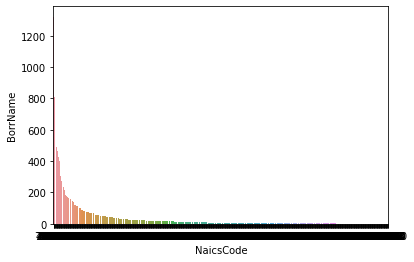

In [44]:
sns.barplot(x ='NaicsCode',y= 'BorrName',data=Naics_group)

#### Loan Amount Statistics

In [45]:
merged_df_2022['GrossApproval'].describe()

count    2.831300e+04
mean     5.665922e+05
std      9.107860e+05
min      1.500000e+03
25%      6.000000e+04
50%      2.150000e+05
75%      6.000000e+05
max      7.119100e+06
Name: GrossApproval, dtype: float64

#### Median Loan Value (in USD)

In [46]:
merged_df_2022['GrossApproval'].median()

215000.0

#### Top 5 Borrowing Companies

In [47]:
Gross_group = merged_df_2022.sort_values(by='GrossApproval', ascending=False)
Gross_group.head(5)

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
22973,San Diego Detox LLC,CORPORATION,623312,Homes for the Elderly,Poppy Bank,CA,92040,7119100.0,5339325.0,30,0.015045,4
26731,VANGUARD UTILITY SERVICE INC.,CORPORATION,238220,"Plumbing, Heating, and Air-Conditioning Contra...","Newtek Small Business Finance, Inc.",KY,42301,6750000.0,2437500.0,266,0.118789,2
23481,Silbertechit LLC,CORPORATION,541512,Computer Systems Design Services,"Newtek Small Business Finance, Inc.",NJ,7677,5660000.0,4245000.0,10,0.002287,6
12644,JANCEL INC,CORPORATION,333413,Industrial and Commercial Fan and Blower and A...,Meridian Bank,NJ,7016,5115000.0,3750000.0,64,0.185619,5
25729,The Network Pro Inc.,CORPORATION,541990,"All Other Professional, Scientific, and Techni...",Live Oak Banking Company,CA,92867,5020000.0,3740000.0,108,0.002570,6


#### Bottom 5 Borrowing Companies

In [48]:
Gross_group.tail(5)

,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality
27924,XOAC LLC,CORPORATION,454112,Electronic Auctions,"TD Bank, National Association",PA,19148,3000.0,1500.0,0,0.004703,2
23324,Shauna Cucunato,INDIVIDUAL,339999,All Other Miscellaneous Manufacturing,The Huntington National Bank,PA,16117,3000.0,1500.0,0,0.012380,5
12262,Innovative Plums LLC,CORPORATION,424420,Packaged Frozen Food Merchant Wholesalers,The Huntington National Bank,OH,44130,2500.0,2125.0,0,0.003456,2
2843,BELRUZ26 Company LLC,CORPORATION,454110,Electronic Shopping and Mail-Order Houses,"TD Bank, National Association",NY,10457,2000.0,1000.0,5,0.004703,2
17197,Mister Clean Professional Clea,INDIVIDUAL,561720,Janitorial Services,"TD Bank, National Association",MA,2653,1500.0,750.0,1,0.009543,4


In [49]:
merged_df_2022.to_excel("merged.xlsx", sheet_name='Sheet1')

### Modeling

In [50]:
import pandas as pd

In [51]:
merged_df_2022 = pd.read_excel("merged.xlsx")    

In [52]:
Attribution_multiplier = 1
merged_df_2022['AttributionFactor'] = merged_df_2022['GrossApproval']*Attribution_multiplier

In [53]:
merged_df_2022['FinancedEmissions'] = merged_df_2022['ImpactPotential']*merged_df_2022['AttributionFactor']

In [54]:
# Financed Emissions Per Dollar per company
merged_df_2022['FinancedEmissionsPerDollar'] = merged_df_2022['FinancedEmissions']/merged_df_2022['GrossApproval']

In [55]:
merged_df_2022

,Unnamed: 0,BorrName,BusinessType,NaicsCode,NaicsDescription,BankName,BorrState,BorrZip,GrossApproval,SBAGuaranteedApproval,JobsSupported,ImpactPotential,Quality,AttributionFactor,FinancedEmissions,FinancedEmissionsPerDollar
0,0,#1 AUTO LIQUIDATORS LLC,CORPORATION,441120,Used Car Dealers,"Newtek Small Business Finance, Inc.",FL,32097,520000,390000.0,8,0.004307,3,520000,2239.683680,0.004307
1,1,$NP DESIGNS LLC,CORPORATION,541430,Graphic Design Services,"Newtek Small Business Finance, Inc.",NY,10119,10000,5000.0,2,0.002760,4,10000,27.596290,0.002760
2,2,''1st Care AFH LLC,CORPORATION,623312,Homes for the Elderly,Umpqua Bank,WA,98058,1116600,837450.0,2,0.015045,4,1116600,16798.916486,0.015045
3,3,'brosia bowl LLC,INDIVIDUAL,722513,Limited-Service Restaurants,Celtic Bank Corporation,SD,57104,35800,30430.0,6,0.014357,5,35800,513.978667,0.014357
4,4,1 BEAUTY US LLC,CORPORATION,446120,"Cosmetics, Beauty Supplies, and Perfume Stores","Readycap Lending, LLC",CA,92211,350000,262500.0,10,0.004727,2,350000,1654.487743,0.004727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28308,28308,wallingford gulf llc,CORPORATION,811198,All Other Automotive Repair and Maintenance,"Webster Bank, National Association",CT,6492,50000,25000.0,0,0.008021,4,50000,401.048850,0.008021
28309,28309,willam trading LLC,CORPORATION,423990,Other Miscellaneous Durable Goods Merchant Who...,"TD Bank, National Association",NJ,7022,90000,45000.0,0,0.003456,2,90000,311.038470,0.003456
28310,28310,xive Corporation,CORPORATION,621610,Home Health Care Services,"United Midwest Savings Bank, National Association",MD,21061,125000,106250.0,6,0.008588,4,125000,1073.547125,0.008588
28311,28311,yummy house china bistro inc,CORPORATION,722511,Full-Service Restaurants,Cadence Bank,FL,33610,350000,262500.0,21,0.014357,5,350000,5024.931100,0.014357


### Modeling Analysis

#### Total Financed Emissions (in KGCO2)

In [56]:
merged_df_2022['FinancedEmissions'].sum()

1120704938.3065114

#### Approximate equal to 154 thousand flights from JFK (NY) to LHR (London)

#### Total Portfolio Value (in USD)

In [57]:
merged_df_2022['GrossApproval'].sum()

16041924700

#### Total Emissions By Quality Level (in KGCO2)

In [58]:
merged_df_2022.groupby(by='Quality').sum('FinancedEmissions')[['GrossApproval', 'FinancedEmissions']]

,GrossApproval,FinancedEmissions
Quality,,
0,1999500,2.856166e+05
2,3160152800,1.745745e+08
3,3745207700,6.347975e+08
4,5741142100,1.708304e+08
5,1955018200,6.206943e+07
6,1438404400,7.814750e+07


#### Financed Emissions per Dollar (in KGCO2/$)

In [59]:
merged_df_2022['FinancedEmissions'].sum()/merged_df_2022['GrossApproval'].sum()

0.06986100229647078

#### Following Analysis on Companies with data quality higher than 3

In [ ]:
final_df = merged_df_2022[(merged_df_2022.Quality == 6) | (merged_df_2022.Quality == 5) | (merged_df_2022.Quality == 4)]


#### Companies with highest Emission per dollar

In [ ]:
final_df.sort_values(by='FinancedEmissionsPerDollar').tail(10)

In [ ]:
final_df.sort_values(by='FinancedEmissionsPerDollar').head(10)